In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
from scipy import stats

###### Задача 1.

In [2]:
# Дано
N = 8000
n = 180
y_sum = 114317 # of 180
y_sum_squared = 74765381 # of 180
confident = 0.9
# Для решения задачи
alpha = 1 - confident # уровень значимости
fpc = np.sqrt(1 - n / N) # поправка на генеральную совокупность
left_quant = stats.norm.ppf(alpha / 2) # левый квантиль
right_quant = stats.norm.ppf(1 -  alpha / 2) # правый квантиль

y_mean = y_sum / n # среднее
y_sum_pred = y_mean * N # точечная оценка суммы генеральной совокупности

var = (y_sum_squared - n * y_mean ** 2) / (n - 1) # дисперсия (несмещенная)
# если смещенная, то формула var = y_sum_squared / n - y_mean ** 2
std = np.sqrt(var) # стандартное отклонение

std_sum_error = N * std * fpc / np.sqrt(n) # стандартная ошибка оценки суммы
left = y_sum_pred + left_quant * std_sum_error
right = y_sum_pred + right_quant * std_sum_error
print(f'Доверительный интервал (90%) для оценки суммы генеральной совокупности\nsum = {y_sum_pred} in: [{left}; {right}]')

Доверительный интервал (90%) для оценки суммы генеральной совокупности
sum = 5080755.555555555 in: [4974152.373259407; 5187358.737851704]


###### Задача 2.
Требуется проверить выборки на однородность. Для этого нужно их проверить на равенство средних и дисперсий. Поскольку данные имеют нормальное распределение (по условию), то воспользуемся критерием Фишера для проверки равенства дисперсий, после чего для проверки равенства средних воспользуемся либо критерием Стьюдента, если дисперсии равны, либо критерием Манна-Уитни (или Ансари-Бредли), если дисперсии не равны. Гипотеза $H_0$: средние (дисперсии) выборок равны. Альтернативная гипотеза $H_1$: средние (дисперсии) выборок не равны 

In [3]:
alpha = 0.05
x = np.array([12.85, 13.02, 13.73, 13, 14.37, 13.58, 14.48, 13.54, 15, 14.8, 14.8, 14.63, 13.29])
y = np.array([13.43, 13.65, 13.62, 13.39, 13.18, 13.09, 13.07, 13.67, 13.6, 13.59, 13.97, 12.59])
n = y.size
m = x.size
x_var = stats.tvar(x)
y_var = stats.tvar(y)
F = y_var / x_var
p_value = 1 - stats.f.cdf(F, n - 1, m - 1)
print(f'T = {F}', f'p_value = {p_value}') 

T = 0.22563901982583837 p_value = 0.9902970583645858


Поскольку p_value > 0.05, делаем вывод об однородности данных в плане сжатия/растяжения (то есть остаемся в рамках нулевой гипотезы, что дисперсии выборок равны). Теперь можно воспользоваться критерием Стьюдента.

In [4]:
T, p_value = stats.ttest_ind(x, y)
p_value

0.043832635777236346

Поскольку p_value < 0.05, делаем вывод о неоднородности данных в плане смещения (то есть отвергаем нулевую гипотезу в пользу альтернативной, средние не равны).

Таким образом, данные не полностью однородны.

###### Задача 3.
Поскольку данные по своей природе представляют собой порядковые значения, лучше выбрать непараметрический критерий для проверки равенства средних (критерий Ансари-Бредли или Манна-Уитни). P.S. Можно проверить данные на нормальность и воспользоваться критерием Стьюдента, если кажется, что порядок не имеет значения в данном контексте.

$H_0$: средние равны

$H_1$: средние не равны

Уровень значимости $\alpha = 0.05$

In [5]:
x = np.array([72, 91, 82, 86, 100, 65, 67, 86, 81, 86, 80, 79])
y = np.array([70, 92, 74, 74, 100, 86, 100, 95, 78, 92, 100, 80, 77, 91])
T, p_value = stats.ansari(x, y)
p_value

C:\Users\Alex\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2130: UserWarning: Ties preclude use of exact statistic.
  warnings.warn("Ties preclude use of exact statistic.")


0.17290407138711017

Поскольку p_value > 0.05, то остаемся в рамках нулевой гипотезы (средние равны)

###### Задача 4.
Здесь данные явно заданы порядковой шкалой, поэтому нет сомнений используем непараметрический критерий (Пирсона или Кендалла) для проверки гипотезы о независимости параметров.

$H_0$: количество детей в семье не зависит от ее материального благополучия

$H_1$: количество детей в семье зависит от ее материального благополучия

Уровень значимости $\alpha = 0.05$

In [6]:
x = np.array([4, 1, 2, 2, 3, 2, 3, 1, 4, 3])
y = np.array([5, 3, 1, 4, 2, 5, 1, 3, 4, 2])
T, p_value = stats.pearsonr(x, y)
p_value

0.7037814416384003

Поскольку p_value > 0.05, то остаемся в рамках нулевой гипотезы (параметры независимы)

###### Задача 5.
Проверим данные на нормальность, в зависимости от этого воспользуемся тем или иным критерием.

$H_0$: нет зависимости

$H_1$: есть зависимость

Уровень значимости $\alpha = 0.05$

In [7]:
x = np.array([1372859000, 1271775000, 318615000, 252812245, 203261122, 189612027, 178516904, 157503337, 146267288, 126910000, 119713203, 101108300])
y = np.array([9598962, 3287590, 9519431, 1904556, 8514877, 803940, 923768, 144000, 17125407, 377835, 1972550, 299764])
stats.shapiro(x)

(0.5909668207168579, 9.027670603245497e-05)

Население не имеет нормальное распределение, следовательно уже нельзя использовать критерий Пирсона. Воспользуемся критерием Кендалла

In [8]:
stats.kendalltau(x, y)

KendalltauResult(correlation=0.4242424242424242, pvalue=0.06286914699241088)

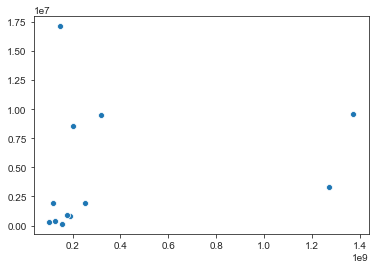

In [9]:
sns.scatterplot(x, y)

Хотя коэффициент корреляции не такой уж маленький, связь слабая и p_value > 0.05, а значит мы остаемся в рамках нулевой гипотезы (зависимости нет)

###### Задача 6.
Здесь данные явно заданы таблицей зависимости, что намекает на использование критерия Хи-квадрат + требуется посмотреть меру связи.

$H_0$: нет зависимости

$H_1$: есть зависимость

Уровень значимости $\alpha = 0.05$

In [10]:
data = np.array([[63, 1007, 2739, 1191], [805, 2633, 1445, 117]])
n = np.sum(data)
chi, p_value, df, _ = stats.chi2_contingency(data)
p_value

0.0

p_value < 0.05 значит отвергаем нулевую гипотезу в пользу альтернативно (есть зависимость)

In [11]:
pearson_coef = np.sqrt(chi / (chi + n))
kramer_coef = np.sqrt(chi / (n * (min(data.shape[0], data.shape[1]) - 1)))
pearson_coef, kramer_coef

(0.45719713589651345, 0.5140712087966722)

Мера связи умеренная

###### Задача 7.

Воспользуемся непараметрическим критерием, посколько часы являются порядковой величиной

$H_0$: нет зависимости

$H_1$: есть зависимость

Уровень значимости $\alpha = 0.05$

In [12]:
x = np.array([1.3, 1.9, 2.2, 3.1, 3.3, 4, 4.1, 4.4, 4.6, 4.7, 4.8, 5.2, 5.3, 5.6, 6.1, 6.2, 6.2, 6.7, 7.4, 8.3])
y = np.array([74, 66, 86, 65, 51, 77, 79, 76, 80, 77, 82, 89, 81, 78, 74, 81, 87, 100, 95, 89])

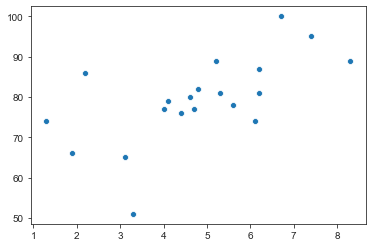

In [13]:
sns.scatterplot(x, y)

In [14]:
_, p_value = stats.pearsonr(x, y)
p_value

0.003423987940871321

Поскольку p_value < 0.05, отвергаем нулевую гипотезу в пользу альтернативной, то есть данные зависимы.